In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Read in pizza.csv and print the first row.

In [35]:
pizza=pd.read_csv('pizza.csv')
pizza

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568717,-92.161596,NaN,11.99,...,USD,2016-07-06T20:05:49Z,NaN,Supreme Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek
3506,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568717,-92.161596,NaN,9.99,...,USD,2016-07-06T20:05:49Z,NaN,Vegetarian Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek
3507,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996444,-76.845180,NaN,5.00,...,USD,2015-10-23T01:03:47Z,NaN,Pita Pizza,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg
3508,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996444,-76.845180,NaN,20.00,...,USD,2015-10-23T01:03:47Z,NaN,Steak Pizzaiola,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg


### Plot the top 10 most common pizzas.
Look at *menus.name*.

<AxesSubplot:>

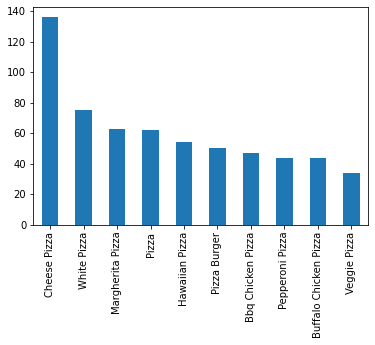

In [17]:
pizza['menus.name'].value_counts()[:10].plot(kind='bar')

### Plot the top 10 cities with the most pizza items.
The x-axis should be the city, and the y-axis the number of menu items that show up in this city (i.e., the number of rows corresponding to this city).

<AxesSubplot:>

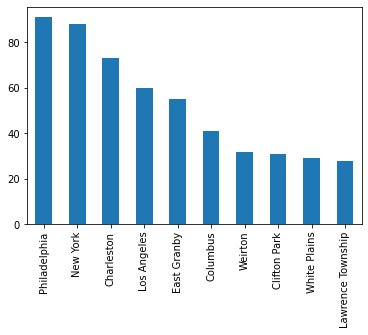

In [19]:
pizza['city'].value_counts()[:10].plot(kind='bar')

### Find the cheapest pizza (anywhere!)

Look at the *menus.amountMin* field, but ignore rows where *menus.amountMin = 0* (because there's no such thing as a free pizza; it's probably just missing data).

In [28]:
mask=pizza['menus.amountMin']>0
df2=pizza[mask]
df2[df2['menus.amountMin'] == df2['menus.amountMin'].min()]

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
2773,AVwdRcoEIN2L1WUfuEI1,5320 Highway 6,Pizza Place,Missouri City,US,us/tx/missouricity/5320highway6/-2027443347,29.574793,-95.57549,NaN,0.25,...,USD,"2016-05-03T09:21:31Z,2016-03-29T05:22:42Z",NaN,Cheese Pizza,New York Pizzeria,77459,NaN,NaN,NaN,TX


### Find the top 10 restaurants (or chains) with the biggest menus (i.e., they serve the most distinct pizzas).

A restaurant or a chain has a *name*, and serves a pizza of type *menus.name*. You want to count the number of unique *menus.name* for each *name*, and pick the top 10 *names* with the most menu options.

Note: You may see multiple rows where **name = Sicilia's Pizza** (say) and **menus.name = Cheese Pizza**. This probably means Sicilia's pizza is a chain. We **don't** want to count Cheese Pizza twice when counting the menu size for Sicilia's Pizza.

In [36]:
pizza['menus.name','name']

KeyError: ('menus.name', 'name')

### How many unique restaurant names have a menuPageURL that is not missing?

In [39]:
pizza[pizza['country']=='US']

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568717,-92.161596,NaN,11.99,...,USD,2016-07-06T20:05:49Z,NaN,Supreme Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek
3506,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568717,-92.161596,NaN,9.99,...,USD,2016-07-06T20:05:49Z,NaN,Vegetarian Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek
3507,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996444,-76.845180,NaN,5.00,...,USD,2015-10-23T01:03:47Z,NaN,Pita Pizza,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg
3508,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996444,-76.845180,NaN,20.00,...,USD,2015-10-23T01:03:47Z,NaN,Steak Pizzaiola,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg


### Check if any postalCode is associated with multiple provinces.

The "province" is the state code, while the postalCode is the zipcode. We don't expect any zipcode to cross state boundaries, but how would you check it?

,0,1,2,3,4,5,6,7,8,9,...,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509
id,AVwc_6KEIN2L1WUfrKAH,AVwc_6KEIN2L1WUfrKAH,AVwc_6qRByjofQCxkcxw,AVwc_6qRByjofQCxkcxw,AVwc_6qRByjofQCxkcxw,AVwc_6qRByjofQCxkcxw,AVwc_6qRByjofQCxkcxw,AVwc_7d_IN2L1WUfrKNN,AVwc_7d_IN2L1WUfrKNN,AVwc_7d_IN2L1WUfrKNN,...,AVweYUZ0IN2L1WUf4Z9q,AVweYUZ0IN2L1WUf4Z9q,AVweYUZ0IN2L1WUf4Z9q,AVweYUZ0IN2L1WUf4Z9q,AVweYUZ0IN2L1WUf4Z9q,AVweYUZ0IN2L1WUf4Z9q,AVweYUZ0IN2L1WUf4Z9q,AVweZ5SbIN2L1WUf4nWU,AVweZ5SbIN2L1WUf4nWU,AVweZioPIN2L1WUf4kR_
address,Cascade Village Mall Across From Target,Cascade Village Mall Across From Target,148 S Barrington Ave,148 S Barrington Ave,148 S Barrington Ave,148 S Barrington Ave,148 S Barrington Ave,5142 Hollywood Blvd,5142 Hollywood Blvd,5142 Hollywood Blvd,...,305 Ash St,305 Ash St,305 Ash St,305 Ash St,305 Ash St,305 Ash St,305 Ash St,4140 Carlisle Rd,4140 Carlisle Rd,9563 Kings Charter Doctor B
categories,Pizza Place,Pizza Place,"American Restaurant,Bar,Bakery","American Restaurant,Bar,Bakery","American Restaurant,Bar,Bakery","American Restaurant,Bar,Bakery","American Restaurant,Bar,Bakery",Pizza Place,Pizza Place,Pizza Place,...,Bar and Gastropub,Bar and Gastropub,Bar and Gastropub,Bar and Gastropub,Bar and Gastropub,Bar and Gastropub,Bar and Gastropub,"Restaurant,Italian Restaurant","Restaurant,Italian Restaurant",Restaurant
city,Bend,Bend,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,...,Jefferson City,Jefferson City,Jefferson City,Jefferson City,Jefferson City,Jefferson City,Jefferson City,Dover,Dover,Ashland
country,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
keys,us/or/bend/cascadevillagemallacrossfromtarget/...,us/or/bend/cascadevillagemallacrossfromtarget/...,us/brentwood/losangeles/148sbarringtonave/-151...,us/brentwood/losangeles/148sbarringtonave/-151...,us/brentwood/losangeles/148sbarringtonave/-151...,us/brentwood/losangeles/148sbarringtonave/-151...,us/brentwood/losangeles/148sbarringtonave/-151...,us/losfeliz/losangeles/5142hollywoodblvd/-2867...,us/losfeliz/losangeles/5142hollywoodblvd/-2867...,us/losfeliz/losangeles/5142hollywoodblvd/-2867...,...,us/honeycreek/jeffersoncity/305ashst/-735513695,us/honeycreek/jeffersoncity/305ashst/-735513695,us/honeycreek/jeffersoncity/305ashst/-735513695,us/honeycreek/jeffersoncity/305ashst/-735513695,us/honeycreek/jeffersoncity/305ashst/-735513695,us/honeycreek/jeffersoncity/305ashst/-735513695,us/honeycreek/jeffersoncity/305ashst/-735513695,us/davidsburg/dover/4140carlislerd/-1821521454,us/davidsburg/dover/4140carlislerd/-1821521454,us/va/ashland/9563kingscharterdoctorb/-1234885075
latitude,44.102665,44.102665,34.064563,34.064563,34.064563,34.064563,34.064563,34.101742,34.101742,34.101742,...,38.568717,38.568717,38.568717,38.568717,38.568717,38.568717,38.568717,39.996444,39.996444,37.69316
longitude,-121.300797,-121.300797,-118.469017,-118.469017,-118.469017,-118.469017,-118.469017,-118.301973,-118.301973,-118.301973,...,-92.161596,-92.161596,-92.161596,-92.161596,-92.161596,-92.161596,-92.161596,-76.84518,-76.84518,-77.43744
menuPageURL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
menus.amountMax,22.5,18.95,12.0,13.0,13.0,15.0,15.0,10.99,11.99,16.99,...,10.99,NaN,10.99,9.99,12.99,11.99,9.99,5.0,20.0,NaN
